In [255]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from prettytable import PrettyTable

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [256]:
data = pd.read_csv("drive/MyDrive/Heart Attack Prediction/heart.csv")

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [258]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [259]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [260]:
for column in data.columns:

    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    

data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

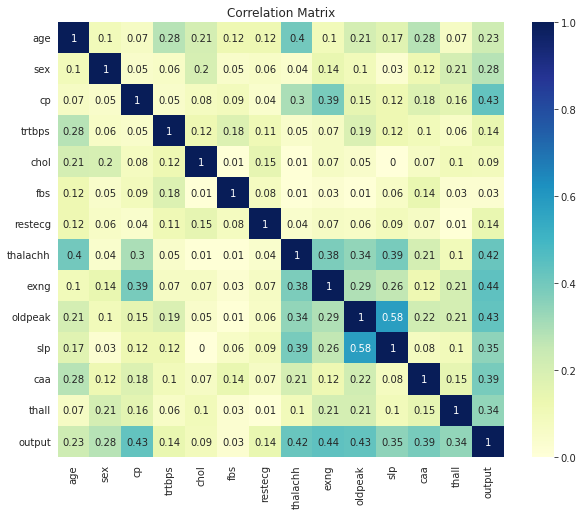

In [266]:
abs_corr = data.corr().abs().round(2)

sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.figure(figsize=(10,8))

sns.heatmap(abs_corr, annot=True, cmap="YlGnBu")

plt.title('Correlation Matrix')

In [262]:
X = data.drop(columns=["trtbps", "chol", "fbs", "restecg", "output"])
Y = data["output"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [263]:
classifiers = [
    ("MLP Classifier", MLPClassifier()),
    ("Ada Boost Classifier", AdaBoostClassifier()), 
    ("Random Forest Classifier", RandomForestClassifier()), 
    ("Gradient Boosting Classifier",GradientBoostingClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("Gaussian Naive Bayes Classifier", GaussianNB())
    ]

trained_models = []

for index, tup in enumerate(classifiers):

    model = tup[1].fit(X_train, Y_train)
    trained_models.append((tup[0], model))

In [264]:
test_scores = []

for index, tup in enumerate(trained_models):

    score = tup[1].score(X_test, Y_test)
    test_scores.append((tup[0], round(score, 3)))

In [265]:
x = PrettyTable(["Model", "Test Accuracy"])

for index, tup in enumerate(test_scores): 
  
  x.add_row([tup[0], f"{tup[1] * 100} %"])

print(x)

+---------------------------------+---------------+
|              Model              | Test Accuracy |
+---------------------------------+---------------+
|          MLP Classifier         |     82.6 %    |
|       Ada Boost Classifier      |     87.0 %    |
|     Random Forest Classifier    |     89.1 %    |
|   Gradient Boosting Classifier  |     87.0 %    |
|        Bagging Classifier       |     87.0 %    |
| Gaussian Naive Bayes Classifier |     80.4 %    |
+---------------------------------+---------------+
